In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("Social_Network_Ads.csv")

In [83]:
df = df.iloc[:,2:]

In [84]:
df.sample(5)

,Age,EstimatedSalary,Purchased
52,29,83000,0
146,27,96000,1
251,37,52000,0
391,47,23000,1
206,55,130000,1


Train test split

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df["Purchased"],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

StandardScaler

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [88]:
X_train.scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test.scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_22284\2083065533.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
C:\Users\ashwi\AppData\Local\Temp\ipykernel_22284\2083065533.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_test.scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)


In [89]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [90]:
np.round(X_train.scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


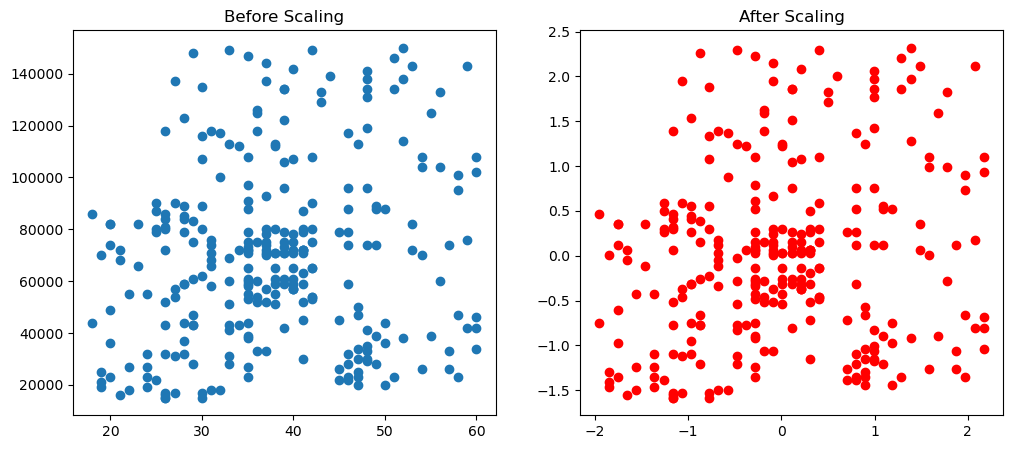

In [91]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled_df['Age'], X_train_scaled_df['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()


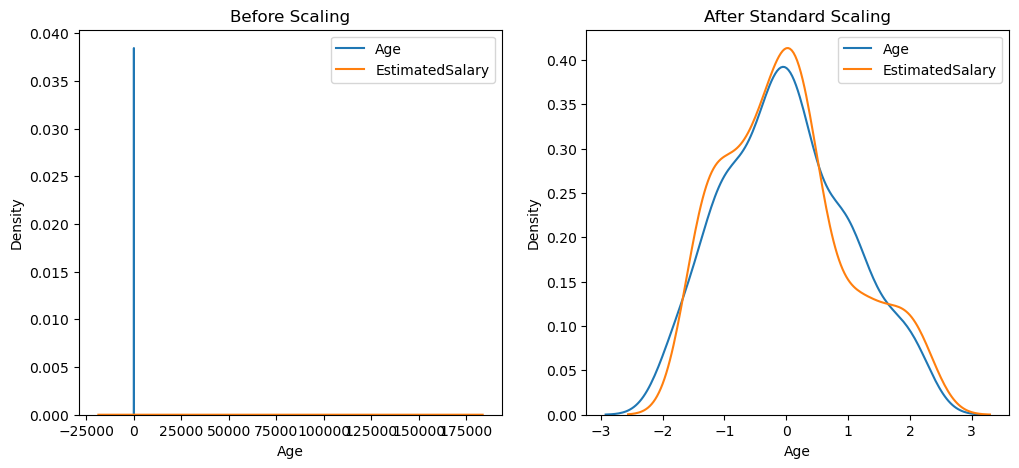

In [92]:
# Convert scaled data back into DataFrame to use column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='EstimatedSalary')
ax1.legend()

# After scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled_df['Age'], ax=ax2, label='Age')
sns.kdeplot(X_train_scaled_df['EstimatedSalary'], ax=ax2, label='EstimatedSalary')
ax2.legend()

plt.show()



Comparison of Distributions

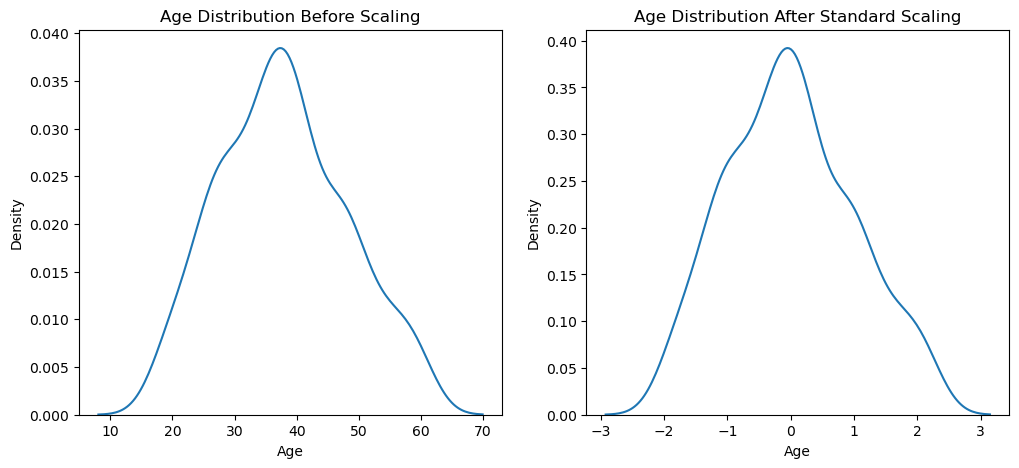

In [93]:
# Convert scaled data back to DataFrame with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# After scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled_df['Age'], ax=ax2)

plt.show()

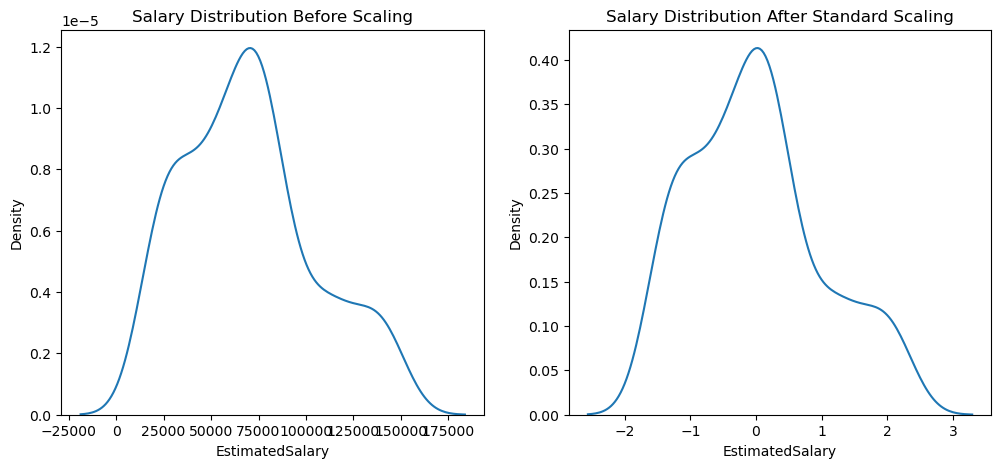

In [94]:
# Convert scaled data to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# After scaling
ax2.set_title('Salary Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled_df['EstimatedSalary'], ax=ax2)

plt.show()

Why scaling is important?

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [97]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)


LogisticRegression()

In [98]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [103]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [104]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [105]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8583333333333333


In [106]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Effect of Outlier

In [107]:
df = pd.concat(
    [df, pd.DataFrame({'Age':[5,90,95],
                       'EstimatedSalary':[1000,250000,350000],
                       'Purchased':[0,1,1]})],
    ignore_index=True
)


In [108]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


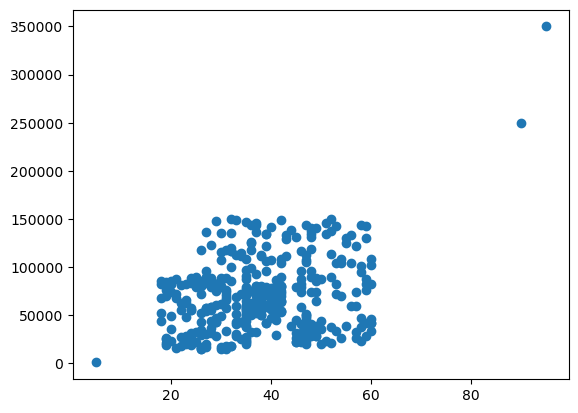

In [109]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

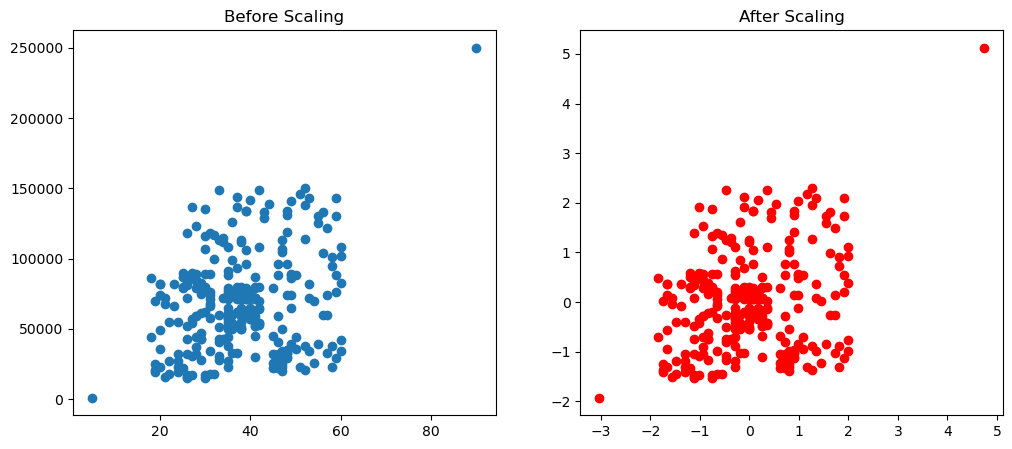

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()